In [1]:
import os
import cv2
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split

In [2]:
# Define the path to your image folders
image_folder_path = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each folder in the main directory
for folder_name in os.listdir(image_folder_path):
    folder_path = os.path.join(image_folder_path, folder_name)

    # Check if the item in the main directory is a folder
    if os.path.isdir(folder_path):
        # Iterate through each image file in the subfolder
        for image_filename in os.listdir(folder_path):
            if image_filename.endswith(".jpg"):  # Check for image files
                image_path = os.path.join(folder_path, image_filename)

                # Load the image using OpenCV
                image = cv2.imread(image_path)

                # Check if the image was loaded successfully
                if image is not None:
                    # Resize the image to 224x224 if needed
                    if image.shape[0] >= 224 and image.shape[1] >= 224:
                        image = cv2.resize(image, (224, 224))
                    else:
                        print(f"Image dimensions are too small for resizing: {image_path}")

                    # Append the image to the list of images
                    images.append(image)

                    # Load the corresponding label (XML file)
                    xml_filename = os.path.splitext(image_filename)[0] + ".xml"
                    xml_path = os.path.join(folder_path, xml_filename)

                    # Check if the XML file exists
                    if os.path.exists(xml_path):
                        # Parse the XML file to extract the label (you may need to adjust this based on your XML structure)
                        tree = ET.parse(xml_path)
                        root = tree.getroot()

                        # Find the "label" element and check if it exists
                        label_element = root.find("label")
                        if label_element is not None:
                            label = label_element.text  # Use .text to get the text content of the element
                            labels.append(label)
                        else:
                            # Handle the case where the "label" element is missing
                            print(f"'label' element not found in XML file: {xml_path}")
                    else:
                        # Handle the case where the XML label file is missing
                        print(f"XML label file not found for image: {image_path}")


XML label file not found for image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria195.jpg
XML label file not found for image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria156.jpg
XML label file not found for image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria630.jpg
XML label file not found for image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria624.jpg
XML label file not found for image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria142.jpg
XML label file not found for image: /Users/sumaiyauddin/Documents

In [3]:
# Convert the lists to NumPy arrays for further analysis
images = np.array(images)
labels = np.array(labels)

# Now, check the shapes
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (899, 224, 224, 3)
Labels shape: (0,)


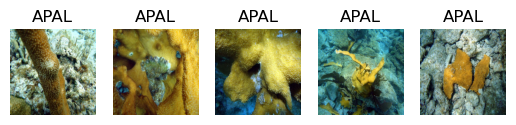

In [6]:
# Perform your initial EDA here, e.g., display some images
num_samples_to_display = 5
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis("off")

plt.show()

In [7]:
# Initialize a dictionary to store counts for each coral type
coral_counts = {}

# Iterate through each folder in the main directory
for folder_name in os.listdir(image_folder_path):
    folder_path = os.path.join(image_folder_path, folder_name)
    
    # Check if the item in the main directory is a folder
    if os.path.isdir(folder_path):
        # Count the number of images in the subfolder
        num_images = len(os.listdir(folder_path))
        
        # Store the count in the dictionary with the coral type as the key
        coral_counts[folder_name] = num_images

# Display the counts for each coral type
for coral_type, count in coral_counts.items():
    print(f"{coral_type}: {count} images")

APAL: 120 images
Pseudodiploria: 788 images


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [9]:
# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (725, 512, 512, 3)
y_train shape: (725,)
X_test shape: (182, 512, 512, 3)
y_test shape: (182,)


Text(0, 0.5, 'Frequency')

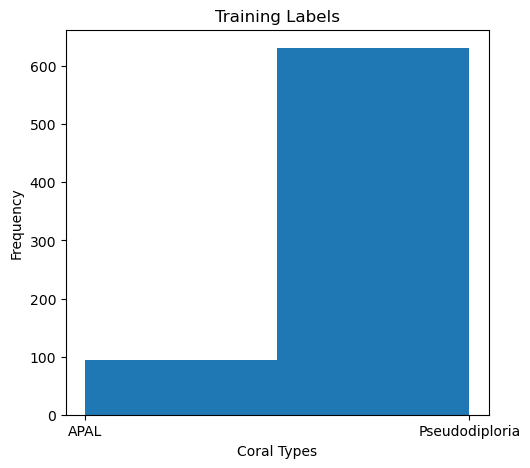

In [10]:
# Example: Display training labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=len(np.unique(y_train)))
plt.title('Training Labels')
plt.xlabel('Coral Types')
plt.ylabel('Frequency')

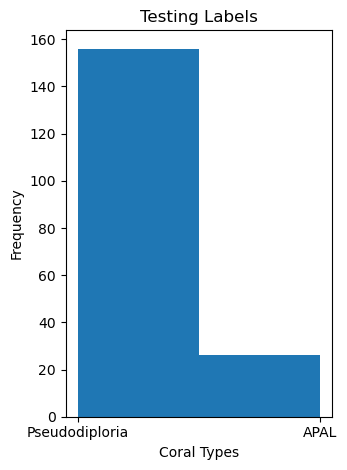

In [11]:
# Example: Display testing labels
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=len(np.unique(y_test)))
plt.title('Testing Labels')
plt.xlabel('Coral Types')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

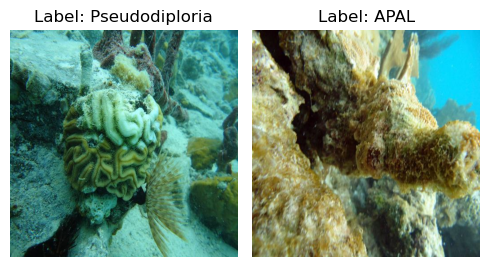

In [12]:
import matplotlib.pyplot as plt
import random

# Define the number of rows and columns for the grid
num_rows = 1
num_columns = 2

# Create a random selection of unique labels from your dataset
unique_labels = np.unique(labels)

# Ensure the number of selected labels is less than or equal to the number of unique labels
num_samples = min(num_rows * num_columns, len(unique_labels))
selected_labels = random.sample(list(unique_labels), num_samples)

# Create subplots for displaying the selected images and labels
fig, axes = plt.subplots(num_rows, num_columns, figsize=(5, 3))
axes = axes.ravel()

for i, label in enumerate(selected_labels):
    # Find the indices of all samples with the target class label
    class_indices = np.where(labels == label)[0]
    
    # Randomly select one index from the class indices
    selected_index = random.choice(class_indices)
    
    # Display the selected image and label
    axes[i].imshow(cv2.cvtColor(images[selected_index], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Label: {label}')
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [14]:
# # Define the number of rows and columns for the grid
# num_rows = 2
# num_columns = 5

# # Define the target classes
# target_classes = ["Pseudodiploria", "APAL"]

# # Initialize variables to count how many images have been selected for each class
# class_counts = {class_label: 0 for class_label in target_classes}

# # Create subplots for displaying the selected images and labels
# fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6))
# axes = axes.ravel()

# for i, class_label in enumerate(target_classes):
#     for j in range(num_columns):
#         # Find the indices of all samples in the training set with the target class label
#         class_indices = [idx for idx, label in enumerate(y_train) if label == class_label]
        
#         # Ensure we don't select more images than available
#         if class_counts[class_label] < len(class_indices):
#             # Get the index of the image to display
#             selected_index = class_indices[class_counts[class_label]]
            
#             # Display the selected image and label
#             axes[i * num_columns + j].imshow(cv2.cvtColor(X_train[selected_index], cv2.COLOR_BGR2RGB))
#             axes[i * num_columns + j].set_title(f'Label: {class_label}')
#             axes[i * num_columns + j].axis("off")
            
#             # Increment the count for this class
#             class_counts[class_label] += 1

# plt.tight_layout()
# plt.show()

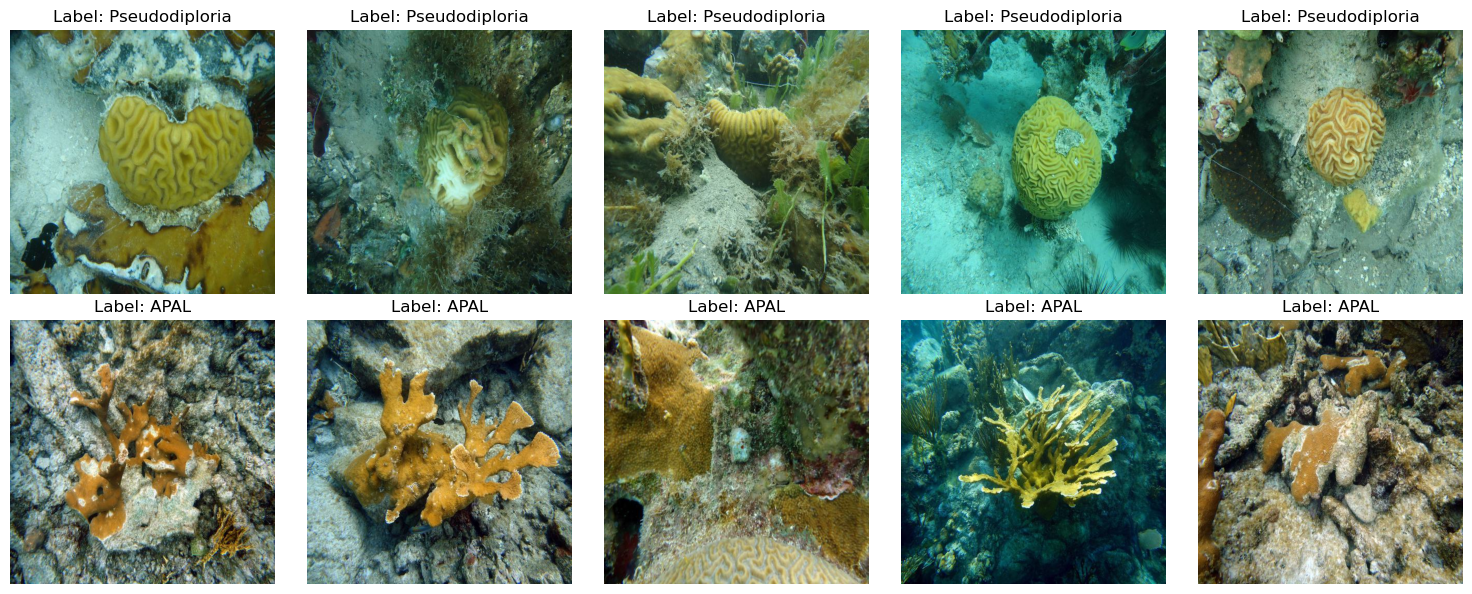

In [14]:
# Create subplots for displaying the selected images and labels
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6))
axes = axes.ravel()

for i, class_label in enumerate(target_classes):
    for j in range(num_columns):
        # Find the indices of all samples in the training set with the target class label
        class_indices = [idx for idx, label in enumerate(y_test) if label == class_label]
        
        # Ensure we don't select more images than available
        if class_counts[class_label] < len(class_indices):
            # Get the index of the image to display
            selected_index = class_indices[class_counts[class_label]]
            
            # Display the selected image and label
            axes[i * num_columns + j].imshow(cv2.cvtColor(X_test[selected_index], cv2.COLOR_BGR2RGB))
            axes[i * num_columns + j].set_title(f'Label: {class_label}')
            axes[i * num_columns + j].axis("off")
            
            # Increment the count for this class
            class_counts[class_label] += 1

plt.tight_layout()
plt.show()

In [15]:
data = (X_train,y_train,X_test,y_test)
with open('../data/external/data.pkl','wb') as f:
    pickle.dump(data, f)

In [16]:
with open('../data/external/data.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [17]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (725, 512, 512, 3)
y_train shape: (725,)
X_test shape: (182, 512, 512, 3)
y_test shape: (182,)


In [4]:
import os
import glob
import xml.etree.ElementTree as ET
import numpy as np

# Define the path to your main coral images folder
coral_image_folder = "/Users/sumaiyauddin/Documents/Semester03/Coral_images"

def extract_classes_from_xml(xml_path):
    with open(xml_path, 'r') as xml_file:
        xml_string = xml_file.read()

    root = ET.fromstring(xml_string)

    # Initialize a list to store class names
    class_names = []

    for object_elem in root.findall('object'):
        class_name = object_elem.find('name').text
        if class_name:
            class_names.append(class_name)

    return class_names

# Initialize lists to store image filenames and class names
image_filenames = []
class_lists = []

# Recursively search for XML files in subfolders
for root, dirs, files in os.walk(coral_image_folder):
    for file in files:
        if file.endswith(".xml"):
            xml_path = os.path.join(root, file)
            image_filename = os.path.splitext(file)[0] + '.jpg'
            class_list = extract_classes_from_xml(xml_path)

            image_filenames.append(image_filename)
            class_lists.append(class_list)

# Convert the lists to NumPy arrays
image_filenames_array = np.array(image_filenames)
class_lists_array = np.array(class_lists, dtype=object)  # Use dtype=object to allow for variable-length lists

# Display the first 5 entries
for i in range(5):
    print(f"Filename: {image_filenames_array[i]}, Classes: {class_lists_array[i]}")


Filename: APAL04.jpg, Classes: ['APAL']
Filename: APAL10.jpg, Classes: ['APAL']
Filename: APAL38.jpg, Classes: ['APAL']
Filename: APAL39.jpg, Classes: ['APAL']
Filename: APAL11.jpg, Classes: ['APAL', 'APAL', 'APAL', 'APAL', 'APAL', 'APAL']


In [5]:
import os
import glob
import xml.etree.ElementTree as ET
import numpy as np

# Define the path to your main coral images folder
coral_image_folder = "/Users/sumaiyauddin/Documents/Semester03/Coral_images"

def extract_classes_from_xml(xml_path):
    with open(xml_path, 'r') as xml_file:
        xml_string = xml_file.read()

    root = ET.fromstring(xml_string)

    # Initialize a list to store class names
    class_names = []

    for object_elem in root.findall('object'):
        class_name = object_elem.find('name').text
        if class_name:
            class_names.append(class_name)

    return class_names

# Initialize lists to store image filenames and class names
image_filenames = []
class_lists = []

# Recursively search for XML files and their corresponding image files in subfolders
for root, dirs, files in os.walk(coral_image_folder):
    for file in files:
        if file.endswith(".xml"):
            xml_path = os.path.join(root, file)
            image_filename = os.path.splitext(file)[0] + '.jpg'
            class_list = extract_classes_from_xml(xml_path)

            image_filenames.append(image_filename)
            class_lists.append(class_list)

# Convert the lists to NumPy arrays
image_filenames_array = np.array(image_filenames)
class_lists_array = np.array(class_lists, dtype=object)  # Use dtype=object to allow for variable-length lists

# Display the first 5 entries
for i in range(5):
    print(f"Filename: {image_filenames_array[i]}, Classes: {class_lists_array[i]}")


Filename: APAL04.jpg, Classes: ['APAL']
Filename: APAL10.jpg, Classes: ['APAL']
Filename: APAL38.jpg, Classes: ['APAL']
Filename: APAL39.jpg, Classes: ['APAL']
Filename: APAL11.jpg, Classes: ['APAL', 'APAL', 'APAL', 'APAL', 'APAL', 'APAL']


In [6]:
from sklearn.model_selection import train_test_split

# Assuming you have two NumPy arrays: image_filenames_array and class_lists_array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_filenames_array, class_lists_array, test_size=0.2, random_state=42)

# X_train and y_train will contain the training data
# X_test and y_test will contain the testing data


In [7]:
# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (719,)
y_train shape: (719,)
X_test shape: (180,)
y_test shape: (180,)


In [27]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

# Define the path to your coral images and annotations
image_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"
xml_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"  # Assuming XML files are in the same folder

def extract_class_from_xml(xml_path):
    with open(xml_path, 'r') as xml_file:
        xml_string = xml_file.read()

    root = ET.fromstring(xml_string)

    # Initialize a list to store class names
    class_names = []

    for object_elem in root.findall('object'):
        class_name = object_elem.find('name').text
        if class_name:
            class_names.append(class_name)

    return class_names

# Get a list of XML files in subfolders
xml_files = glob.glob(os.path.join(xml_folder, '**/*.xml'), recursive=True)

# Initialize lists to store image filenames and class names
image_filenames = []
class_lists = []

# Process the XML files
for xml_file in xml_files:
    image_filename = os.path.splitext(os.path.basename(xml_file))[0] + '.jpg'
    class_list = extract_class_from_xml(xml_file)

    image_filenames.append(image_filename)
    class_lists.append(class_list)

# Create a DataFrame
data = pd.DataFrame({'filename': image_filenames, 'classes': class_lists})

# Display the first 5 rows of the DataFrame
print(data.head())


     filename                               classes
0  APAL04.jpg                                [APAL]
1  APAL10.jpg                                [APAL]
2  APAL38.jpg                                [APAL]
3  APAL39.jpg                                [APAL]
4  APAL11.jpg  [APAL, APAL, APAL, APAL, APAL, APAL]


In [28]:
print(data.iloc[200:205])

                  filename           classes
200  Pseudodiploria747.jpg  [Pseudodiploria]
201  Pseudodiploria784.jpg  [Pseudodiploria]
202  Pseudodiploria785.jpg  [Pseudodiploria]
203  Pseudodiploria746.jpg  [Pseudodiploria]
204  Pseudodiploria752.jpg  [Pseudodiploria]


In [29]:
# Print out class names
unique_classes = data['classes'].explode().unique()
print("Unique class names:", unique_classes)

Unique class names: ['APAL' 'Pseudodiploria']


In [8]:
# import cv2
# import matplotlib.pyplot as plt

# # Convert all file extensions to lowercase
# data['filename'] = data['filename'].str.lower()

# # Define the number of images you want to display
# num_images = 5

# # Select a random subset of indices from the DataFrame
# subset_indices = data.sample(num_images).index

# # Create subplots for displaying the selected images and labels
# fig, axes = plt.subplots(1, num_images, figsize=(15, 6))
# axes = axes.ravel()

# for i, selected_index in enumerate(subset_indices):
#     image_path = os.path.join(image_folder, data['filename'][selected_index])
#     img = cv2.imread(image_path)

#     # Check if the image was loaded successfully
#     if img is not None:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         label = ', '.join(data['classes'][selected_index])
#         axes[i].imshow(img)
#         axes[i].set_title(label)
#         axes[i].axis("off")
#     else:
#         print(f"Error loading image: {image_path}")

# plt.tight_layout()
# plt.show()


In [7]:
# import os
# import glob
# import pandas as pd
# import xml.etree.ElementTree as ET
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the path to your image folders
# image_folder_path = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"

# # Initialize lists to store images and labels
# images = []
# labels = []

# # Process the image and XML files
# for folder_name in os.listdir(image_folder_path):
#     folder_path = os.path.join(image_folder_path, folder_name)

#     # Check if the item in the main directory is a folder
#     if os.path.isdir(folder_path):
#         # Iterate through each image file in the subfolder
#         for image_filename in os.listdir(folder_path):
#             if image_filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Check for image files (case-insensitive)
#                 image_path = os.path.join(folder_path, image_filename)

#                 # Load the image using OpenCV
#                 image = cv2.imread(image_path)

#                 # Check if the image was loaded successfully
#                 if image is not None:
#                     # Resize the image to 512x512 if needed
#                     if image.shape[0] >= 512 and image.shape[1] >= 512:
#                         image = cv2.resize(image, (512, 512))
#                     else:
#                         print(f"Image dimensions are too small for resizing: {image_path}")

#                     # Append the image to the list of images
#                     images.append(image)

#                     # Load the corresponding label (XML file)
#                     xml_filename = os.path.splitext(image_filename)[0] + ".xml"
#                     xml_path = os.path.join(folder_path, xml_filename)

#                     # Check if the XML file exists
#                     if os.path.exists(xml_path):
#                         # Parse the XML file to extract the label (you may need to adjust this based on your XML structure)
#                         tree = ET.parse(xml_path)
#                         root = tree.getroot()

#                         # Find the "label" element and check if it exists
#                         label_element = root.find("label")
#                         if label_element is not None:
#                             label = label_element.text  # Use .text to get the text content of the element
#                             labels.append(label)
#                         else:
#                             # Handle the case where the "label" element is missing
#                             print(f"'label' element not found in XML file: {xml_path}")
#                     else:
#                         # Handle the case where the XML label file is missing
#                         print(f"XML label file not found for image: {image_path}")
#                 else:
#                     # Handle the case where the image cannot be loaded
#                     print(f"Error loading image: {image_path}")

# # Convert the lists to NumPy arrays for further analysis
# images = np.array(images)
# labels = np.array(labels)

# # Perform your initial EDA here, e.g., display some images
# num_samples_to_display = 5
# for i in range(num_samples_to_display):
#     plt.subplot(1, num_samples_to_display, i + 1)
#     plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
#     plt.title(labels[i])
#     plt.axis("off")

# plt.show()


In [10]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from PIL import Image
import torch
import numpy as np
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

# Define the path to your Coral images and annotations
image_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"
xml_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"

class CoralDataset(Dataset):
    def __init__(self, image_folder, xml_folder, transforms=None):
        self.image_folder = image_folder
        self.xml_folder = xml_folder
        self.transforms = transforms
        self.data = self._process_data()

    def _process_data(self):
        # Get a list of XML files in subfolders
        xml_files = glob.glob(os.path.join(self.xml_folder, '**/*.xml'), recursive=True)

        data = []

        for xml_file in xml_files:
            image_filename = os.path.splitext(os.path.basename(xml_file))[0] + '.jpg'
            class_list = self._extract_class_from_xml(xml_file)

            data.append({'image_filename': image_filename, 'classes': class_list})

        return data

    def _extract_class_from_xml(self, xml_path):
        with open(xml_path, 'r') as xml_file:
            xml_string = xml_file.read()

        root = ET.fromstring(xml_string)

        class_names = []

        for object_elem in root.findall('object'):
            class_name = object_elem.find('name').text
            if class_name:
                class_names.append(class_name)

        return class_names

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_filename = self.data[idx]['image_filename']
        image_path = os.path.join(self.image_folder, image_filename)
        image = Image.open(image_path).convert("RGB")

        class_list = self.data[idx]['classes']

        if self.transforms is not None:
            image = self.transforms(image)

        return image, class_list

# Define data transformations (if needed)
data_transforms = ToTensor()  # Example: Convert images to PyTorch tensors

# Create custom dataset instances for training and validation
train_dataset = CoralDataset(image_folder, xml_folder, transforms=data_transforms)
validation_dataset = CoralDataset(image_folder, xml_folder, transforms=data_transforms)

# Create data loaders for training and validation
batch_size = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/Pseudodiploria597.jpg'

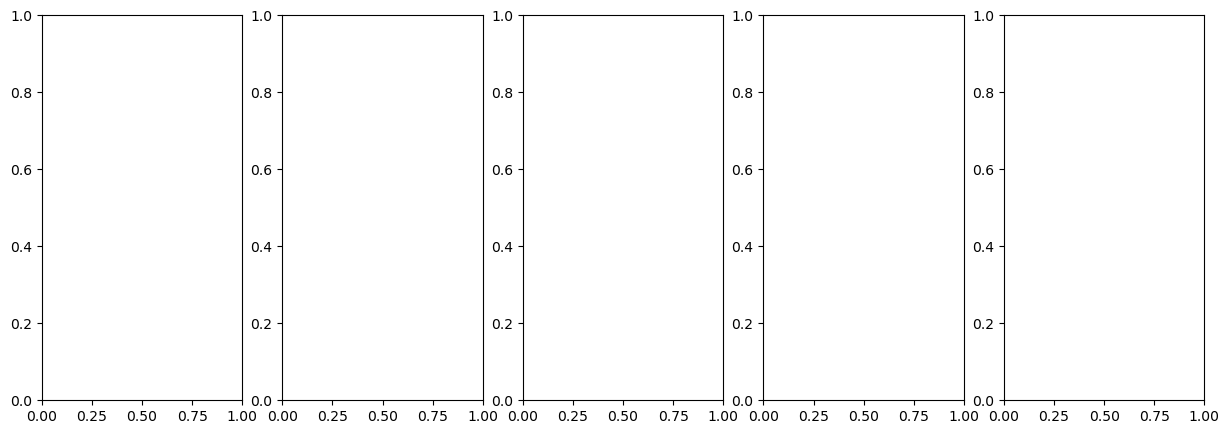

In [12]:
import matplotlib.pyplot as plt
import random

# Function to visualize images
def visualize_images(dataset, num_images_to_display=5):
    # Randomly select images to display
    num_samples = len(dataset)
    display_indices = random.sample(range(num_samples), num_images_to_display)

    fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 5))

    for i, idx in enumerate(display_indices):
        image, class_list = dataset[idx]

        # Display the image
        axs[i].imshow(image.permute(1, 2, 0))  # Convert to (H, W, C) format
        axs[i].set_title(f"Classes: {', '.join(class_list)}")
        axs[i].axis('off')

    plt.show()

# Visualize images from the training dataset
visualize_images(train_dataset, num_images_to_display=5)

# Visualize images from the validation dataset
visualize_images(validation_dataset, num_images_to_display=5)
